# Investigate display problem

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Files:
# cols0.csv  - true colours
# cols.csv  - error starting at LED 42
# cols2.csv  - error starting at LED 840

cols0 = np.loadtxt('cols0.csv', delimiter=',')
assert cols0.shape == (1593, 3)
cols1 = np.loadtxt('cols1.csv', delimiter=',')
assert cols1.shape == (1593, 3)
cols2 = np.loadtxt('cols2.csv', delimiter=',')
assert cols2.shape == (1593, 3)

In [3]:
firstLedOfStrip = (
    0, 100, 200, 298, 398, 498, 598, 698,
    798, 897, 996, 1095, 1195, 1295, 1395, 1495, 1593
)

max_val = max(cols0.max(), cols1.max(), cols2.max())
max_val = 48

def reshape_colour_array(cols):
    reshaped_data = np.full((16, 100, 3), np.nan)
    for i in range(16):
        f, l = firstLedOfStrip[i:i+2]
        reshaped_data[i, :l-f, :] = cols[f:l] / (max_val + 1)
    return reshaped_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


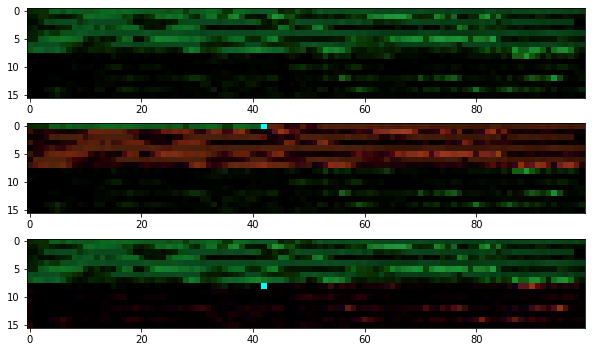

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for i, data in enumerate([cols0, cols1, cols2]):
    reshaped_data = reshape_colour_array(data)
    axes[i].imshow(reshaped_data)

plt.show()

In [5]:
x = np.concatenate([cols0, cols1], axis=1)
x[:10]

array([[ 2.,  7.,  0.,  2.,  7.,  0.],
       [ 1.,  9.,  0.,  1.,  9.,  0.],
       [ 2.,  9.,  0.,  2.,  9.,  0.],
       [ 2.,  8.,  1.,  2.,  8.,  1.],
       [ 2., 18.,  4.,  2., 18.,  4.],
       [ 2., 18.,  6.,  2., 18.,  6.],
       [ 3., 15.,  3.,  3., 15.,  3.],
       [ 2., 19.,  6.,  2., 19.,  6.],
       [ 2., 17.,  6.,  2., 17.,  6.],
       [ 3., 17.,  6.,  3., 17.,  6.]])

In [6]:
x[38:48,:]

array([[  2.,  20.,   6.,   2.,  20.,   6.],
       [  2.,  19.,   6.,   2.,  19.,   6.],
       [  2.,  17.,   6.,   2.,  17.,   6.],
       [  2.,  17.,   7.,   2.,  17.,   7.],
       [  2.,  17.,   7.,   2., 255., 255.],
       [  3.,  17.,   7.,  17.,   7.,   3.],
       [  3.,  17.,   6.,  17.,   7.,   3.],
       [  1.,   6.,   0.,  17.,   6.,   1.],
       [  2.,   9.,   1.,   6.,   0.,   2.],
       [  2.,   8.,   1.,   9.,   1.,   2.]])

In [7]:
# Rogue data consisting of 2 x 255 is being inserted into the colour data...

In [8]:
x = np.concatenate([cols0, cols2], axis=1)
x[798+38:798+48]

array([[  0.,   2.,   0.,   0.,   2.,   0.],
       [  2.,   4.,   1.,   2.,   4.,   1.],
       [  1.,   1.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.],
       [  0.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   0.],
       [  1.,   2.,   0.,   0.,   0.,   1.],
       [  2.,   4.,   0.,   2.,   0.,   2.]])

In [9]:
# In both cases the rogue data occurs at the 42nd LED...